### Grafdatabas
**OBS** Fråga 1-3 nedan är desamma för både Godkänt och Väl godkänt. Det som skiljer sig är hur du väljer att skapa databasen samt fråga 4.

#### Godkänt
* Läs in `csv`-filerna i `kunskapskontroll_1/data/movies/prepared/` i Neo4j och skapa en datamodell.
* Svara på frågorna och utför instruktionerna nedan. Klistra in dina svar som JSON eller bilder, beroende på om svaret är i data- eller graf-form.
    1. Vilka är de 10 vanligaste kombinationerna av genrer?
    2. Vilka är de fem vanligaste genrerna på filmer regisserade av Steven Spielberg, och hur många filmer är i de genrerna?
    3. Det verkar som om de har missat att Viggo Mortensen är med i Sagan om Ringen-filmerna. Skapa `[:ACTED_IN]`-relationer mellan Viggo och alla tre *The Lord of the Rings*-filmerna. Visa en graf med Viggo i mitten och relationer till de tre filmerna.

#### Väl godkänt
* Bearbeta datan i `kunskapskontroll_1/data/movies/movies.json` så att den passar till att läsas in i Neo4j. Processen ska gå att följa i kodceller i notebooken. Du får gärna titta på filerna i `kunskapskontroll_1/data/movies/prepared/` för att få en idé om hur resultatet ska se ut.
* Läs in data in Neo4j.
* Svara på frågorna och utför instruktionerna nedan. Klistra in dina svar som JSON eller bilder, beroende på om svaret är i data- eller graf-form.
    1. Vilka är de 10 vanligaste kombinationerna av genrer?
    2. Vilka är de fem vanligaste genrerna på filmer regisserade av Steven Spielberg, och hur många filmer är i de genrerna?
    3. Det verkar som om de har missat att Viggo Mortensen är med i Sagan om Ringen-filmerna. Skapa `[:ACTED_IN]`-relationer mellan Viggo och alla tre *The Lord of the Rings*-filmerna. Visa en graf med Viggo i mitten och relationer till de tre filmerna.
    4. Hitta på minst en egen fråga och svara på den.



In [1]:
from neo4j import GraphDatabase

In [3]:
import json
import pandas as pd


with open('/Users/AliceNguyen/Documents/Data Manager - TUC/(År 1.5) Databastyper/movies.json', 'r', encoding='utf-8') as f:
    data = json.load(f)


df = pd.DataFrame(data)

df.to_csv('movies_prepared.csv', index=False, encoding='utf-8')


Svar 1: Vilka är de 10 vanligaste kombinationerna av genrer?

Query:

In [ ]:
MATCH (m:Movies)-[:HAS_GENRE]->(g:Genres)
WITH m, COLLECT(g.genre) AS genre_combination
RETURN genre_combination, COUNT(*) AS count
ORDER BY count DESC
LIMIT 10;

SVAR:

In [2]:
import json

In [ ]:
with open ("/Users/AliceNguyen/Documents/Data Manager - TUC/(År 1.5) Databastyper/KK1_Neo4j_fråga1.json", "r") as f:
    fråga1_data = json.load(f)


In [4]:
fråga1_data

[{'genre_combination': ['Drama'], 'count': 212},
 {'genre_combination': ['Comedy'], 'count': 189},
 {'genre_combination': ['Comedy', 'Drama'], 'count': 181},
 {'genre_combination': ['Comedy', 'Romance', 'Drama'], 'count': 180},
 {'genre_combination': ['Comedy', 'Romance'], 'count': 149},
 {'genre_combination': ['Romance', 'Drama'], 'count': 146},
 {'genre_combination': ['Thriller', 'Drama', 'Crime'], 'count': 94},
 {'genre_combination': ['Horror'], 'count': 63},
 {'genre_combination': ['Action', 'Thriller', 'Crime'], 'count': 61},
 {'genre_combination': ['Action', 'Thriller', 'Drama', 'Crime'], 'count': 61}]

Query:

In [ ]:
MATCH (d:Directors {director_name: 'Steven Spielberg'})-[:DIRECTED]->(m:Movies)-[:HAS_GENRE]->(g:Genres)
WITH g.genre AS genre, COUNT(*) AS genre_count
ORDER BY genre_count DESC
LIMIT 5
RETURN genre, genre_count;

Svar:

In [29]:
with open ("/Users/AliceNguyen/Documents/Data Manager - TUC/(År 1.5) Databastyper/KK1_Neo4j_fråga2.json", "r") as f:
    fråga2_data = json.load(f)

In [6]:
fråga2_data

[{'genre': 'Drama', 'genre_count': 13},
 {'genre': 'Adventure', 'genre_count': 12},
 {'genre': 'Action', 'genre_count': 9},
 {'genre': 'Sci-Fi', 'genre_count': 7},
 {'genre': 'Thriller', 'genre_count': 6}]

Query:

In [ ]:
MATCH (m:Movies)
WHERE m.movie_title CONTAINS 'The Lord of the Rings'
MATCH (a:Actors) WHERE a.actor_name = "Viggo Mortensen"

MERGE (a)-[:ACTED_IN]->(m)

Svar:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread("/Users/AliceNguyen/Documents/Data Manager - TUC/(År 1.5) Databastyper/KK1_neo4j_fråga3.png")

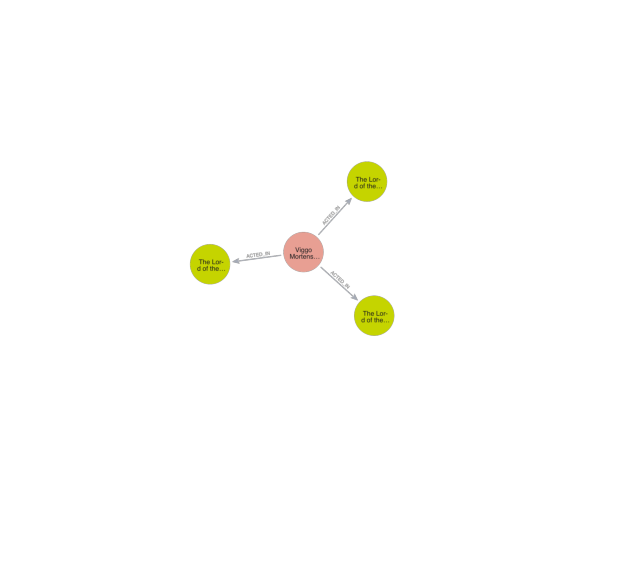

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)
plt.axis("off")  
plt.show()


* Extra fråga: Vilka skådespelare har spelat i flest filmer tillsammans?
* Query:

In [ ]:
MATCH (a1:Actors)-[:ACTED_IN]->(m:Movies)<-[:ACTED_IN]-(a2:Actors)
WHERE a1 <> a2
WITH a1.actor_name AS Actor1, a2.actor_name AS Actor2, COUNT(m) AS MoviesTogether
ORDER BY MoviesTogether DESC
LIMIT 10
RETURN Actor1, Actor2, MoviesTogether;

Svar:

In [33]:
with open ("/Users/AliceNguyen/Documents/Data Manager - TUC/(År 1.5) Databastyper/KK1_neo4j_extrafråga.json", "r") as f:
    frågaextra = json.load(f)

In [34]:
frågaextra

[{'Actor1': 'Steve Buscemi', 'Actor2': 'Adam Sandler', 'MoviesTogether': 6},
 {'Actor1': 'Adam Sandler', 'Actor2': 'Steve Buscemi', 'MoviesTogether': 6},
 {'Actor1': 'Leonard Nimoy',
  'Actor2': 'Nichelle Nichols',
  'MoviesTogether': 6},
 {'Actor1': 'Nichelle Nichols',
  'Actor2': 'Leonard Nimoy',
  'MoviesTogether': 6},
 {'Actor1': 'Robert Downey Jr.',
  'Actor2': 'Scarlett Johansson',
  'MoviesTogether': 4},
 {'Actor1': 'Rupert Grint', 'Actor2': 'Daniel Radcliffe', 'MoviesTogether': 4},
 {'Actor1': 'Johnny Depp', 'Actor2': 'Jack Davenport', 'MoviesTogether': 4},
 {'Actor1': 'Daniel Radcliffe', 'Actor2': 'Rupert Grint', 'MoviesTogether': 4},
 {'Actor1': 'Jack Davenport', 'Actor2': 'Johnny Depp', 'MoviesTogether': 4},
 {'Actor1': 'Scarlett Johansson',
  'Actor2': 'Robert Downey Jr.',
  'MoviesTogether': 4}]